Importing requiring Libraries

In [1]:
# %pip install pandas
# %pip install scikit-learn
# %pip install matplotlib
# %pip install seaborn
# %pip install xgboost
# %pip install lightgbm
# %pip install catboost
# %pip install mlflow

In [2]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
import xgboost as xgb
import mlflow

In [ ]:
# from sklearn.metrics import root_mean_squared_error

In [ ]:
file_path='/Users/mohamedafrith/Downloads/train_data.csv'
df=pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


Mapping

In [ ]:
month_mapping = {
    1:'Jan',2: 'Feb' ,3:'Mar',4: 'Apr',5: 'May',6: 'Jun',
    7:'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'
}
df['month']=df['month'].map(month_mapping)

In [ ]:
mapping_dict = {
    1: "Australia",
    2: "Austria",
    3: "Belgium",
    4: "British Virgin Islands",
    5: "Cayman Islands",
    6: "Christmas Island",
    7: "Croatia",
    8: "Cyprus",
    9: "Czech Republic",
    10: "Denmark",
    11: "Estonia",
    12: "unidentified",
    13: "Faroe Islands",
    14: "Finland",
    15: "France",
    16: "Germany",
    17: "Greece",
    18: "Hungary",
    19: "Iceland",
    20: "India",
    21: "Ireland",
    22: "Italy",
    23: "Latvia",
    24: "Lithuania",
    25: "Luxembourg",
    26: "Mexico",
    27: "Netherlands",
    28: "Norway",
    29: "Poland",
    30: "Portugal",
    31: "Romania",
    32: "Russia",
    33: "San Marino",
    34: "Slovakia",
    35: "Slovenia",
    36: "Spain",
    37: "Sweden",
    38: "Switzerland",
    39: "Ukraine",
    40: "United Arab Emirates",
    41: "United Kingdom",
    42: "USA",
    43: "biz (.biz)",
    44: "com (.com)",
    45: "int (.int)",
    46: "net (.net)",
    47: "org (*.org)"
}
df['country']=df['country'].map(mapping_dict)

In [ ]:
mapping_dict_for_page1={
    1:'trousers',
    2:'skirts',
    3:'blouses',
    4:'sale'}
df['page1_main_category']=df['page1_main_category'].map(mapping_dict_for_page1) 

In [ ]:
color_mapping = {
    1: "beige",
    2: "black",
    3: "blue",
    4: "brown",
    5: "burgundy",
    6: "gray",
    7: "green",
    8: "navy blue",
    9: "of many colors",
    10: "olive",
    11: "pink",
    12: "red",
    13: "violet",
    14: "white"
}
df['colour']=df['colour'].map(color_mapping)


In [ ]:
site_location_mapping={
1:'top left',
2:'top in the middle',
3:'top right',
4:'bottom left',
5:'bottom in the middle',
6:'bottom right'}
df['location']=df['location'].map(site_location_mapping)

In [ ]:
model_photography_mapping={1:'en face',
2:'profile'}
df['model_photography']=df['model_photography'].map(model_photography_mapping)

In [ ]:
price_2_mapping={
1:'yes',
2:'no'}
df['price_2']=df['price_2'].map(price_2_mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  object
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  object
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  object
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  object
 9   location              132379 non-null  object
 10  model_photography     132379 non-null  object
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  object
 13  page                  132379 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 14.1+ MB


Outlier Detection and Correction

In [ ]:
column_list_with_outlier=['order','price']

In [ ]:
df.describe()

,year,day,order,session_id,price,page
count,132379.0,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000
mean,2008.0,14.507671,9.811314,12038.722063,43.788191,1.712137
std,0.0,8.829106,13.458937,7012.460866,12.539390,0.983699
min,2008.0,1.000000,1.000000,1.000000,18.000000,1.000000
25%,2008.0,7.000000,2.000000,5905.000000,33.000000,1.000000
50%,2008.0,14.000000,6.000000,11931.000000,43.000000,1.000000
75%,2008.0,22.000000,12.000000,18212.000000,52.000000,2.000000
max,2008.0,31.000000,195.000000,24026.000000,82.000000,5.000000


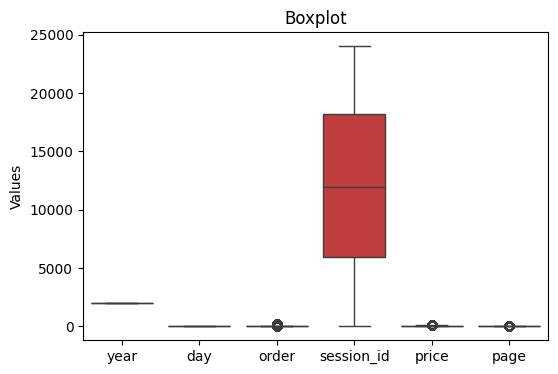

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df)

# Add title and labels
plt.title("Boxplot")
plt.ylabel("Values")

# Show the plot
plt.show()


In [ ]:
for i in column_list_with_outlier:
    

    # Calculate Q1, Q3, and IQR for the chosen i
    Q1 = df[i].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[i].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers in the chosen i
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    mean_without_outliers = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)][i].mean()
    mean_without_outliers=round(mean_without_outliers)
    print(i,mean_without_outliers)
    print('***************************')

    print("Detected Outliers in '{}':\n".format(i), outliers)

order 7
***************************
Detected Outliers in 'order':
         year month  day  order         country  session_id  \
34      2008   Aug    3     32          Poland       22439   
36      2008   Apr   10     46          Poland        2766   
41      2008   Apr   10     30          Poland        2710   
61      2008   Jul    8     40  Czech Republic       18274   
71      2008   Jul   11     29       Lithuania       18677   
...      ...   ...  ...    ...             ...         ...   
132310  2008   Apr    1     29        Slovakia         168   
132311  2008   Jun    7     89         Germany       13332   
132333  2008   Apr    4     35          Poland        1272   
132343  2008   May    8     89          Poland        8201   
132356  2008   Jul   14     43          Poland       19168   

       page1_main_category page2_clothing_model          colour  \
34                    sale                  P60           white   
36                 blouses                  C33       

In [ ]:
df.loc[df["order"] >= 32 , "order"] = 7
df.loc[df["price"] >= 82 , "price"] = 43

In [ ]:
df.describe()

,year,day,order,session_id,price,page
count,132379.0,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000
mean,2008.0,14.507671,7.391278,12038.722063,43.333905,1.712137
std,0.0,8.829106,6.599171,7012.460866,11.833374,0.983699
min,2008.0,1.000000,1.000000,1.000000,18.000000,1.000000
25%,2008.0,7.000000,2.000000,5905.000000,33.000000,1.000000
50%,2008.0,14.000000,6.000000,11931.000000,43.000000,1.000000
75%,2008.0,22.000000,10.000000,18212.000000,52.000000,2.000000
max,2008.0,31.000000,31.000000,24026.000000,77.000000,5.000000


In [ ]:
df

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,Jun,22,21,Poland,15648,blouses,C20,violet,top left,profile,48,yes,2
1,2008,May,19,6,Poland,10018,skirts,B26,violet,top right,en face,57,yes,2
2,2008,Jul,15,2,Poland,19388,blouses,C13,of many colors,bottom in the middle,en face,48,yes,1
3,2008,May,2,2,Poland,7181,skirts,B11,black,bottom left,en face,43,no,1
4,2008,Jun,9,16,Poland,13493,skirts,B31,of many colors,bottom in the middle,en face,57,yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,Jul,4,3,Poland,17622,sale,P19,black,top left,en face,48,yes,2
132375,2008,Jun,19,9,Poland,15165,blouses,C26,white,top right,en face,28,no,2
132376,2008,Jul,15,4,Poland,19359,trousers,A4,blue,top in the middle,profile,38,no,1
132377,2008,Jul,28,16,Poland,21454,blouses,C50,of many colors,bottom in the middle,profile,20,no,3


Feature Engineering

In [ ]:
df['country'].value_counts()

country
Poland                    107173
Czech Republic             14465
Lithuania                   3272
net (.net)                  1988
com (.com)                  1130
Germany                      632
Ireland                      622
Slovakia                     584
United Kingdom               539
Belgium                      193
Netherlands                  190
unidentified                 166
USA                          141
Sweden                       133
Romania                      121
Denmark                      120
Italy                        116
Norway                       116
Switzerland                  114
France                        96
Estonia                       90
Luxembourg                    54
Austria                       49
Russia                        40
Finland                       35
Latvia                        34
Iceland                       24
Ukraine                       24
biz (.biz)                    23
Greece                        17
Hu

In [ ]:
non_european = [
    'USA', 'India', 'Mexico', 'Australia', 'Cayman Islands', 'British Virgin Islands', 
    'Faroe Islands', 'Christmas Island'
]
domains = ['net (.net)', 'com (.com)', 'org (*.org)', 'biz (.biz)', 'int (.int)', 'unidentified']
df['country'] = df['country'].replace(non_european + domains, 'Others')


In [ ]:
def categorize_region(country):
    central_europe = ['Poland', 'Czech Republic', 'Slovakia', 'Hungary']
    northern_europe = ['Sweden', 'Denmark', 'Norway', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Iceland', 'Ireland', 'United Kingdom']
    western_europe = ['Germany', 'France', 'Netherlands', 'Belgium', 'Switzerland', 'Luxembourg', 'Austria']
    southern_europe = ['Italy', 'Spain', 'Portugal', 'Greece', 'San Marino', 'Croatia', 'Slovenia', 'Cyprus']
    eastern_europe = ['Romania', 'Russia', 'Ukraine', 'Bulgaria', 'Moldova']
    others=['Others']

    if country in central_europe:
        return 'Central Europe'
    elif country in northern_europe:
        return 'Northern Europe'
    elif country in western_europe:
        return 'Western Europe'
    elif country in southern_europe:
        return 'Southern Europe'
    elif country in eastern_europe:
        return 'Eastern Europe'
    elif country in others:
        return 'Others'
     


df['Region'] = df['country'].apply(categorize_region)


In [ ]:
df['page2_clothing_model'].value_counts()

page2_clothing_model
B4     2824
A2     2389
A11    2247
P1     2134
B10    2011
       ... 
P31      64
P66      42
P79       2
P22       2
P54       1
Name: count, Length: 216, dtype: int64

In [ ]:
df['month'].unique()

array(['Jun', 'May', 'Jul', 'Aug', 'Apr'], dtype=object)

In [ ]:

def get_season(month):
    if month in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif month in ['Mar', 'Apr', 'May']:
        return 'Spring'
    elif month in ['Jun', 'Jul', 'Aug']:
        return 'Summer'
    elif month in ['Sep', 'Oct', 'Nov']:
        return 'Fall'
    else:
        return 'Unknown'

df['season'] = df['month'].apply(get_season)


print(df)


        year month  day  order country  session_id page1_main_category  \
0       2008   Jun   22     21  Poland       15648             blouses   
1       2008   May   19      6  Poland       10018              skirts   
2       2008   Jul   15      2  Poland       19388             blouses   
3       2008   May    2      2  Poland        7181              skirts   
4       2008   Jun    9     16  Poland       13493              skirts   
...      ...   ...  ...    ...     ...         ...                 ...   
132374  2008   Jul    4      3  Poland       17622                sale   
132375  2008   Jun   19      9  Poland       15165             blouses   
132376  2008   Jul   15      4  Poland       19359            trousers   
132377  2008   Jul   28     16  Poland       21454             blouses   
132378  2008   Jul    6     17  Poland       17897              skirts   

       page2_clothing_model          colour              location  \
0                       C20          viole

EDA

In [ ]:
df

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,Region,season
0,2008,Jun,22,21,Poland,15648,blouses,C20,violet,top left,profile,48,yes,2,Central Europe,Summer
1,2008,May,19,6,Poland,10018,skirts,B26,violet,top right,en face,57,yes,2,Central Europe,Spring
2,2008,Jul,15,2,Poland,19388,blouses,C13,of many colors,bottom in the middle,en face,48,yes,1,Central Europe,Summer
3,2008,May,2,2,Poland,7181,skirts,B11,black,bottom left,en face,43,no,1,Central Europe,Spring
4,2008,Jun,9,16,Poland,13493,skirts,B31,of many colors,bottom in the middle,en face,57,yes,2,Central Europe,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,Jul,4,3,Poland,17622,sale,P19,black,top left,en face,48,yes,2,Central Europe,Summer
132375,2008,Jun,19,9,Poland,15165,blouses,C26,white,top right,en face,28,no,2,Central Europe,Summer
132376,2008,Jul,15,4,Poland,19359,trousers,A4,blue,top in the middle,profile,38,no,1,Central Europe,Summer
132377,2008,Jul,28,16,Poland,21454,blouses,C50,of many colors,bottom in the middle,profile,20,no,3,Central Europe,Summer


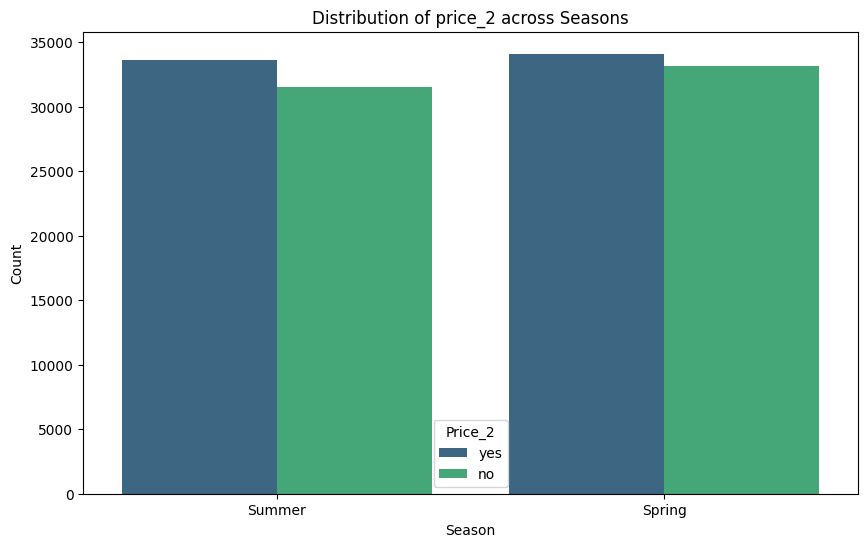

"Sales in both summer and spring season are same but 'no' rates is higher in spring \nseason we can give more discounts in products that will incease the sales in spring season \nmore than summer."

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['season'], hue=df['price_2'], data=df, palette='viridis')

# Add labels and title
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Distribution of price_2 across Seasons")
plt.legend(title="Price_2")
plt.show()
"""Sales in both summer and spring season are same but 'no' rates is higher in spring 
season we can give more discounts in products that will incease the sales in spring season 
more than summer."""

Balancing Techniques

In [ ]:
file_path='/Users/mohamedafrith/Downloads/test_data.csv'
df_test=pd.read_csv(file_path)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33095 entries, 0 to 33094
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  33095 non-null  int64 
 1   month                 33095 non-null  int64 
 2   day                   33095 non-null  int64 
 3   order                 33095 non-null  int64 
 4   country               33095 non-null  int64 
 5   session_id            33095 non-null  int64 
 6   page1_main_category   33095 non-null  int64 
 7   page2_clothing_model  33095 non-null  object
 8   colour                33095 non-null  int64 
 9   location              33095 non-null  int64 
 10  model_photography     33095 non-null  int64 
 11  price                 33095 non-null  int64 
 12  price_2               33095 non-null  int64 
 13  page                  33095 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 3.5+ MB


In [ ]:
df_test['price_2'].value_counts()
#The distribution is almost balanced (close to 50%-50%).

price_2
1    16981
2    16114
Name: count, dtype: int64

In [ ]:
df['price_2'].value_counts()
#The distribution is almost balanced (close to 50%-50%).

price_2
yes    67714
no     64665
Name: count, dtype: int64

Feature Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  object
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  object
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  object
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  object
 9   location              132379 non-null  object
 10  model_photography     132379 non-null  object
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  object
 13  page                  132379 non-null  int64 
 14  Region                132379 non-null  object
 15  season           

In [ ]:
#reverse mapping
reverse_month_mapping = {j: i for i, j in month_mapping.items()}
df['month']=df['month'].map(reverse_month_mapping)

In [ ]:
df['country'].value_counts()

country
Poland            107173
Czech Republic     14465
Others              3480
Lithuania           3272
Germany              632
Ireland              622
Slovakia             584
United Kingdom       539
Belgium              193
Netherlands          190
Sweden               133
Romania              121
Denmark              120
Italy                116
Norway               116
Switzerland          114
France                96
Estonia               90
Luxembourg            54
Austria               49
Russia                40
Finland               35
Latvia                34
Iceland               24
Ukraine               24
Greece                17
Hungary               15
Spain                 12
Croatia                9
Portugal               4
San Marino             3
Slovenia               2
Cyprus                 1
Name: count, dtype: int64

In [ ]:
mapping_dict_current= {
    1: "Others",
    2: "Austria",
    3: "Belgium",
    4: "Others",
    5: "Others",
    6: "Others",
    7: "Croatia",
    8: "Cyprus",
    9: "Czech Republic",
    10: "Denmark",
    11: "Estonia",
    12: "Others",
    13: "Others",
    14: "Finland",
    15: "France",
    16: "Germany",
    17: "Greece",
    18: "Hungary",
    19: "Iceland",
    20: "Others",
    21: "Ireland",
    22: "Italy",
    23: "Latvia",
    24: "Lithuania",
    25: "Luxembourg",
    26: "Others",
    27: "Netherlands",
    28: "Norway",
    29: "Poland",
    30: "Portugal",
    31: "Romania",
    32: "Russia",
    33: "San Marino",
    34: "Slovakia",
    35: "Slovenia",
    36: "Spain",
    37: "Sweden",
    38: "Switzerland",
    39: "Ukraine",
    40: "United Arab Emirates",
    41: "United Kingdom",
    42: "Others",
    43: "Others",
    44: "Others",
    45: "Others",
    46: "Others",
    47: "Others"
}
#reverse mapping for country
reverse_mapping_country= {j: i for i, j in mapping_dict_current.items()}
df['country']=df['country'].map(reverse_mapping_country)


In [ ]:
#reverse mapping for page_1
reverse_mapping_page_1= {j: i for i, j in mapping_dict_for_page1.items()}
df['page1_main_category']=df['page1_main_category'].map(reverse_mapping_page_1)

In [ ]:
#reverse mapping for color
reverse_mapping_color= {j: i for i, j in color_mapping.items()}
df['colour']=df['colour'].map(reverse_mapping_color)

In [ ]:
#reverse mapping for location
reverse_mapping_location= {j: i for i, j in site_location_mapping.items()}
df['location']=df['location'].map(reverse_mapping_location)

In [ ]:
#reverse mapping for model_photography
reverse_mapping_model_photography= {j: i for i, j in model_photography_mapping.items()}
df['model_photography']=df['model_photography'].map(reverse_mapping_model_photography)

In [ ]:
#reverse mapping for price_2
reverse_mapping_price_2= {j: i for i, j in price_2_mapping.items()}
df['price_2']=df['price_2'].map(reverse_mapping_price_2)

In [ ]:
region_mapping={'Central Europe':1,'Northern Europe':2,'Western Europe':3
                ,'Southern Europe':4,'Eastern Europe':5,'Others':0}
df['Region']=df['Region'].map(region_mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
 14  Region                132379 non-null  int64 
 15  season           

In [ ]:
#Label encoding

le = LabelEncoder()
df['page2_clothing_model']=le.fit_transform(df['page2_clothing_model'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  int64 
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
 14  Region                132379 non-null  int64 
 15  season           

In [ ]:
#Label encoding

le = LabelEncoder()
df['season']=le.fit_transform(df['season'])
df

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,Region,season
0,2008,6,22,21,29,15648,3,88,13,1,2,48,1,2,1,1
1,2008,5,19,6,29,10018,2,60,13,3,1,57,1,2,1,0
2,2008,7,15,2,29,19388,3,80,9,5,1,48,1,1,1,1
3,2008,5,2,2,29,7181,2,45,2,4,1,43,2,1,1,0
4,2008,6,9,16,29,13493,2,66,9,5,1,57,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,7,4,3,29,17622,4,145,2,1,1,48,1,2,1,1
132375,2008,6,19,9,29,15165,3,94,14,3,1,28,2,2,1,1
132376,2008,7,15,4,29,19359,1,33,3,2,2,38,2,1,1,1
132377,2008,7,28,16,29,21454,3,121,9,5,2,20,2,3,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   year                  132379 non-null  int64
 1   month                 132379 non-null  int64
 2   day                   132379 non-null  int64
 3   order                 132379 non-null  int64
 4   country               132379 non-null  int64
 5   session_id            132379 non-null  int64
 6   page1_main_category   132379 non-null  int64
 7   page2_clothing_model  132379 non-null  int64
 8   colour                132379 non-null  int64
 9   location              132379 non-null  int64
 10  model_photography     132379 non-null  int64
 11  price                 132379 non-null  int64
 12  price_2               132379 non-null  int64
 13  page                  132379 non-null  int64
 14  Region                132379 non-null  int64
 15  season                132379 non-n

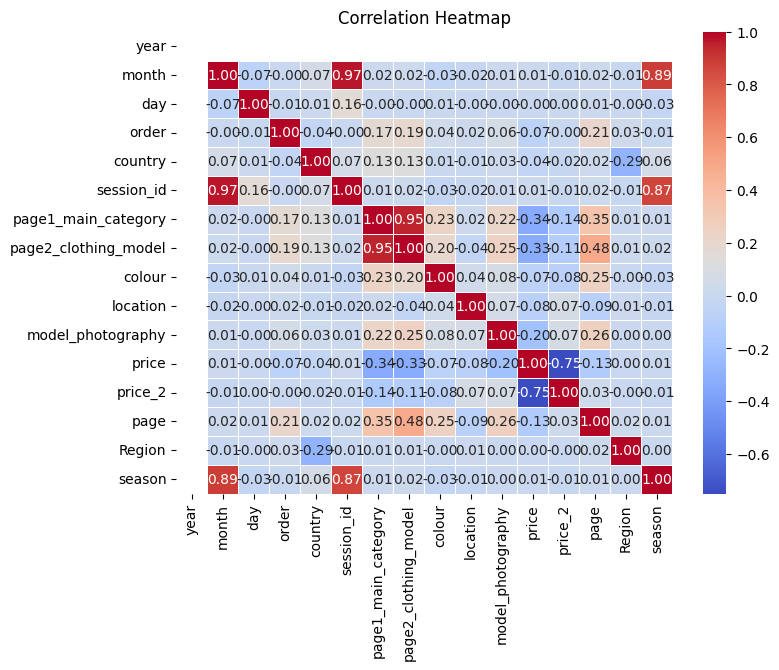

In [ ]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#label encoding for testing data
le = LabelEncoder()
df_test['page2_clothing_model']=le.fit_transform(df_test['page2_clothing_model'])
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33095 entries, 0 to 33094
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   year                  33095 non-null  int64
 1   month                 33095 non-null  int64
 2   day                   33095 non-null  int64
 3   order                 33095 non-null  int64
 4   country               33095 non-null  int64
 5   session_id            33095 non-null  int64
 6   page1_main_category   33095 non-null  int64
 7   page2_clothing_model  33095 non-null  int64
 8   colour                33095 non-null  int64
 9   location              33095 non-null  int64
 10  model_photography     33095 non-null  int64
 11  price                 33095 non-null  int64
 12  price_2               33095 non-null  int64
 13  page                  33095 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33095 entries, 0 to 33094
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   year                  33095 non-null  int64
 1   month                 33095 non-null  int64
 2   day                   33095 non-null  int64
 3   order                 33095 non-null  int64
 4   country               33095 non-null  int64
 5   session_id            33095 non-null  int64
 6   page1_main_category   33095 non-null  int64
 7   page2_clothing_model  33095 non-null  int64
 8   colour                33095 non-null  int64
 9   location              33095 non-null  int64
 10  model_photography     33095 non-null  int64
 11  price                 33095 non-null  int64
 12  price_2               33095 non-null  int64
 13  page                  33095 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


Scaling

In [ ]:
y_train=pd.DataFrame(df['price_2'])
x_train=df.drop(['price_2','season','Region'],axis=1)
x_train

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,page
0,2008,6,22,21,29,15648,3,88,13,1,2,48,2
1,2008,5,19,6,29,10018,2,60,13,3,1,57,2
2,2008,7,15,2,29,19388,3,80,9,5,1,48,1
3,2008,5,2,2,29,7181,2,45,2,4,1,43,1
4,2008,6,9,16,29,13493,2,66,9,5,1,57,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,7,4,3,29,17622,4,145,2,1,1,48,2
132375,2008,6,19,9,29,15165,3,94,14,3,1,28,2
132376,2008,7,15,4,29,19359,1,33,3,2,2,38,1
132377,2008,7,28,16,29,21454,3,121,9,5,2,20,3


In [ ]:
y_train

,price_2
0,1
1,1
2,1
3,2
4,1
...,...
132374,1
132375,2
132376,2
132377,2


In [ ]:
y_test=pd.DataFrame(df_test['price_2'])
x_test=df_test.drop(['price_2'],axis=1)
x_test

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,page
0,2008,4,22,4,29,5279,4,176,9,4,2,33,3
1,2008,5,19,1,29,10059,1,6,14,5,2,33,1
2,2008,4,11,10,29,2919,4,149,6,2,2,28,2
3,2008,4,28,3,27,6304,2,58,11,2,1,57,2
4,2008,5,26,1,29,11266,1,11,3,1,1,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33090,2008,5,13,1,29,8885,1,38,3,2,1,43,1
33091,2008,4,14,3,29,3546,1,6,14,5,2,33,1
33092,2008,6,13,37,29,14336,2,75,1,3,1,48,1
33093,2008,5,23,16,29,10786,3,103,7,6,1,48,2


In [ ]:
y_test

,price_2
0,2
1,2
2,2
3,1
4,2
...,...
33090,2
33091,2
33092,2
33093,1


In [ ]:
x_test

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,page
0,2008,4,22,4,29,5279,4,176,9,4,2,33,3
1,2008,5,19,1,29,10059,1,6,14,5,2,33,1
2,2008,4,11,10,29,2919,4,149,6,2,2,28,2
3,2008,4,28,3,27,6304,2,58,11,2,1,57,2
4,2008,5,26,1,29,11266,1,11,3,1,1,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33090,2008,5,13,1,29,8885,1,38,3,2,1,43,1
33091,2008,4,14,3,29,3546,1,6,14,5,2,33,1
33092,2008,6,13,37,29,14336,2,75,1,3,1,48,1
33093,2008,5,23,16,29,10786,3,103,7,6,1,48,2


In [ ]:
standard_scaler = StandardScaler()
scaled_x_train= standard_scaler.fit_transform(x_train)
scaled_df_x_train=pd.DataFrame(scaled_x_train,columns=x_train.columns)
scaled_df_x_train

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,page
0,0.0,0.314174,0.848597,2.062194,0.268044,0.514697,0.523645,0.091727,1.597940,-1.319159,1.686940,0.394318,0.292634
1,0.0,-0.438805,0.508811,-0.210827,0.268044,-0.288163,-0.349717,-0.383512,1.597940,-0.152333,-0.592789,1.154882,0.292634
2,0.0,1.067153,0.055762,-0.816966,0.268044,1.048035,0.523645,-0.044055,0.654173,1.014493,-0.592789,0.394318,-0.723941
3,0.0,-0.438805,-1.416646,-0.816966,0.268044,-0.692730,-0.349717,-0.638105,-0.997418,0.431080,-0.592789,-0.028217,-0.723941
4,0.0,0.314174,-0.623811,1.304521,0.268044,0.207386,-0.349717,-0.281675,0.654173,1.014493,-0.592789,1.154882,0.292634
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,0.0,1.067153,-1.190122,-0.665431,0.268044,0.796197,1.397008,1.059179,-0.997418,-1.319159,-0.592789,0.394318,0.292634
132375,0.0,0.314174,0.508811,0.243777,0.268044,0.445819,0.523645,0.193565,1.833881,-0.152333,-0.592789,-1.295823,0.292634
132376,0.0,1.067153,0.055762,-0.513896,0.268044,1.043900,-1.223079,-0.841779,-0.761476,-0.735746,1.686940,-0.450753,-0.723941
132377,0.0,1.067153,1.528171,1.304521,0.268044,1.342655,0.523645,0.651831,0.654173,1.014493,1.686940,-1.971880,1.309209


In [ ]:
standard_scaler = StandardScaler()
scaled_x_test= standard_scaler.fit_transform(x_test)
scaled_df_x_test=pd.DataFrame(scaled_x_test,columns=x_test.columns)
scaled_df_x_test

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,page
0,0.0,-1.203186,0.838462,-0.430962,0.285026,-0.980909,1.398759,1.597955,0.655990,0.440673,1.685956,-0.863059,1.327986
1,0.0,-0.450441,0.498908,-0.652266,0.285026,-0.297239,-1.228032,-1.308039,1.839535,1.025556,1.685956,-0.863059,-0.718661
2,0.0,-1.203186,-0.406569,0.011646,0.285026,-1.318454,1.398759,1.136415,-0.054137,-0.729094,1.685956,-1.260425,0.304663
3,0.0,-1.203186,1.517570,-0.504730,0.004959,-0.834306,-0.352435,-0.419147,1.129408,-0.729094,-0.593135,1.044295,0.304663
4,0.0,-0.450441,1.291201,-0.652266,0.285026,-0.124605,-1.228032,-1.222569,-0.764263,-1.313977,-0.593135,-0.068328,-0.718661
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33090,0.0,-0.450441,-0.180199,-0.652266,0.285026,-0.465153,-1.228032,-0.761028,-0.764263,-0.729094,-0.593135,-0.068328,-0.718661
33091,0.0,-1.203186,-0.067015,-0.504730,0.285026,-1.228775,-1.228032,-1.308039,1.839535,1.025556,1.685956,-0.863059,-0.718661
33092,0.0,0.302303,-0.180199,2.003385,0.285026,0.314489,-0.352435,-0.128547,-1.237681,-0.144210,-0.593135,0.329037,-0.718661
33093,0.0,-0.450441,0.951647,0.454255,0.285026,-0.193258,0.523162,0.350087,0.182572,1.610439,-0.593135,0.329037,0.304663


Model Training

In [ ]:
dtc = DecisionTreeClassifier(
    max_depth=6, 
    min_samples_split=15,
    min_samples_leaf=15, 
    max_features='sqrt', 
    ccp_alpha=0.00, 
    random_state=42
)

dtc.fit(scaled_df_x_train, y_train)
y_pred = dtc.predict(scaled_df_x_test)
accuracy_dtc= accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_dtc:.2f}')  # Print Accuracy Score

print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Precision, Recall, F1-score



Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.96      0.93     16981
           2       0.95      0.91      0.93     16114

    accuracy                           0.93     33095
   macro avg       0.93      0.93      0.93     33095
weighted avg       0.93      0.93      0.93     33095



In [ ]:
best_param_dtc={'max_depth':6, 
            'min_samples_split':15,
            'min_samples_leaf':15, 
            'max_features':'sqrt', 
            'ccp_alpha':0.00, 
            'random_state':42}

In [ ]:
y_train_pred = dtc.predict(scaled_df_x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")


Training Accuracy: 91.98%


In [ ]:
with open('decision_tree_classifier_model.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('decision_tree_classifier_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

y_pred_loaded = loaded_model.predict(scaled_df_x_test)
accuracy = accuracy_score(y_test, y_pred_loaded)
print(f'Decision Tree Accuracy: {accuracy:.2f}')

Decision Tree Accuracy: 0.93


In [3]:


# Initialize Random Forest Classifier
rf = RandomForestClassifier(   n_estimators=100,   
    max_depth=5,   # Reduce tree depth  
    min_samples_split=20,  # Increase minimum samples to split  
    min_samples_leaf=10,  # Increase minimum samples per leaf  
    max_features='sqrt',  # Use square root of features  
    ccp_alpha=0.04,  # Prune tree to avoid overfitting  
    random_state=42
 
)


# Train the model
rf.fit(scaled_df_x_train, y_train)

# Make predictions
y_pred = rf.predict(scaled_df_x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.2f}')

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

NameError: name 'RandomForestClassifier' is not defined

In [6]:
y_train_pred = rf.predict(scaled_df_x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

NameError: name 'rf' is not defined

In [7]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)


NameError: name 'pickle' is not defined

In [8]:
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


NameError: name 'pickle' is not defined

In [ ]:
y_pred_loaded = loaded_model.predict(scaled_df_x_test)
accuracy = accuracy_score(y_test, y_pred_loaded)
print(f'Random Forest Accuracy: {accuracy:.2f}')

Random Forest Accuracy: 0.92


ML FLOW

In [ ]:
mlflow.set_experiment("2nd_experiment")
mlflow.set_tracking_uri("http://127.0.0.1:5000")
with mlflow.start_run(run_name="Decision_tree_classifier"):
    mlflow.log_params (best_param_dtc)
    mlflow.log_metrics({'Accuracy': 0.93,
                        'precision':0.91,
                        'recall':0.96,
                        'f1-score':0.93})
    mlflow.sklearn.log_model(dtc,artifact_path="DecisionTreeClassifier", input_example=scaled_df_x_test.iloc[0])

2025/02/18 19:32:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision_tree_classifier at: http://127.0.0.1:5000/#/experiments/385524123148715307/runs/ec9d402b97984ab1899ba9ed7f86b618
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/385524123148715307


In [ ]:
best_param_rfc={'n_estimators':100,   
    'max_depth':5,   # Reduce tree depth  
    'min_samples_split':20,  # Increase minimum samples to split  
    'min_samples_leaf':10,  # Increase minimum samples per leaf  
    'max_features':'sqrt',  # Use square root of features  
    'ccp_alpha':0.04,  # Prune tree to avoid overfitting  
    'random_state':42}

In [ ]:
mlflow.set_experiment("2nd_experiment")
mlflow.set_tracking_uri("http://127.0.0.1:5000")
with mlflow.start_run(run_name="Random_forest_classifier"):
    mlflow.log_params (best_param_rfc)
    mlflow.log_metrics({'Accuracy': 0.92,
                            'precision':0.96 ,    
                            'recall':0.89,  
                            'f1-score':0.92}  )
    mlflow.sklearn.log_model(rf,artifact_path="RandomForestClassifier",input_example=scaled_df_x_test.iloc[0])

2025/02/18 19:42:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random_forest_classifier at: http://127.0.0.1:5000/#/experiments/385524123148715307/runs/559e2dd80dcf4d89a99cf2249030dcd5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/385524123148715307
